In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [36]:
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
df['Day_of_Week'] = label_encoder.fit_transform(df['Day_of_Week'])
df['Traffic_Conditions'] = label_encoder.fit_transform(df['Traffic_Conditions'])
df['Weather'] = label_encoder.fit_transform(df['Weather'])
print(df.head())

   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  \
0             19.35            2            0              3.0   
1             47.59            0            0              1.0   
2             36.87            1            1              1.0   
3             30.33            1            0              4.0   
4               NaN            1            0              3.0   

   Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                   1        0       3.56         0.80             0.32   
1                   0        0        NaN         0.62             0.43   
2                   0        0       2.70         1.21             0.15   
3                   1        3       3.48         0.51             0.15   
4                   0        0       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.903

In [37]:
df.describe()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,1000.000000,1000.000000,950.000000,1000.000000,1000.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,1.248000,0.395000,2.476842,1.289000,0.489000,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.189921,0.582507,1.102249,0.818626,0.813967,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,0.000000,0.000000,1.000000,0.000000,0.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,0.000000,0.000000,1.250000,1.000000,0.000000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,1.000000,0.000000,2.000000,1.000000,0.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,2.000000,1.000000,3.000000,2.000000,1.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [38]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)


In [39]:
df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)
df['Base_Fare'].fillna(df['Base_Fare'].median(), inplace=True)
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].median(), inplace=True)
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median(), inplace=True)
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].median(), inplace=True)




In [44]:
# Remove any duplicate rows from X and y
df_cleaned = df.drop_duplicates(subset=["Trip_Distance_km", "Time_of_Day", "Traffic_Conditions", "Trip_Price"])
X = df_cleaned[["Trip_Distance_km", "Time_of_Day", "Traffic_Conditions"]]
y = df_cleaned["Trip_Price"]

# Check the new shapes
print(X.shape)
print(y.shape)

(990, 3)
(990,)


In [41]:
df_cleaned.count()

,0
Trip_Distance_km,1000
Time_of_Day,1000
Day_of_Week,1000
Passenger_Count,1000
Traffic_Conditions,1000
Weather,1000
Base_Fare,1000
Per_Km_Rate,1000
Per_Minute_Rate,1000
Trip_Duration_Minutes,1000


In [42]:
#Dealing with  the outliers in datset
for column in df.columns:
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  median_value = df[column].median()  # Calculate the median of the column
  df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), median_value)

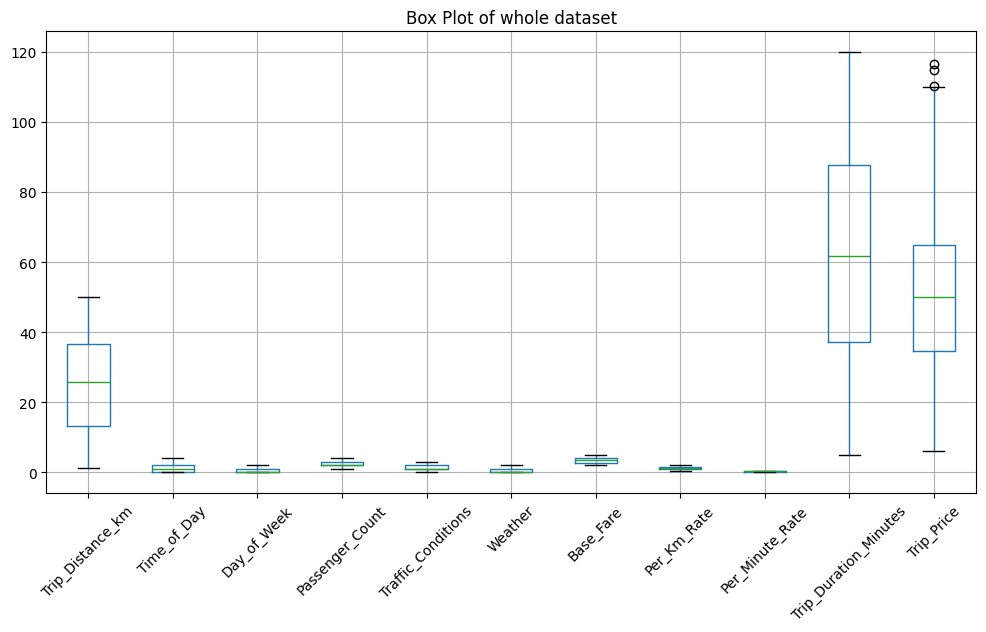

In [43]:
# List of numerical attributes to plot
attributes = [
    "Trip_Distance_km", "Time_of_Day", "Day_of_Week", "Passenger_Count",
    "Traffic_Conditions", "Weather", "Base_Fare", "Per_Km_Rate",
    "Per_Minute_Rate", "Trip_Duration_Minutes", "Trip_Price"
]
plt.figure(figsize=(12, 6))  # Width, Height in inches
df.boxplot()
plt.title('Box Plot of whole dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
# Define the features (X) and target variable (y)
X = df[[    "Trip_Distance_km", "Time_of_Day", "Traffic_Conditions"]]
y = df["Trip_Price"] # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
# Print results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 288.10571361756877
R-squared (R2): 0.3515372619021774


In [ ]:
# Display the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.0803788  0.51611191 0.46630105]
Intercept: 23.255263201405807


Text(0.5, 0, 'Actual Trip Price')

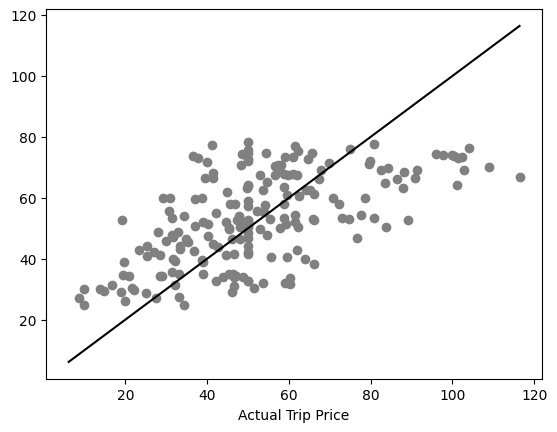

In [ ]:
plt.scatter(y_test, y_pred, color= 'grey', label = 'Predicted Data')
plt.plot([y.min(),y.max()], [y.min(),y.max()], color='black', label='Ideal Prediction Line')
plt.xlabel('Actual Trip Price')


# **Key observations from both graphs**

The two graphs represent **linear regression results**, but one is for a **single variable (simple linear regression)** and the other is for **multiple variables (multiple linear regression)**. Here’s the difference:

### **Graph 1 (Simple Linear Regression)**
- This regression uses **only one independent variable** (e.g., "distance traveled") to predict the dependent variable (e.g., "trip price").
- The points are scattered along the fitted line, showing a general trend.
- The distribution of points seems fairly spread out but still follows the trend.

### **Graph 2 (Multiple Linear Regression)**
- This regression uses **multiple independent variables** (e.g., "distance traveled", "time taken", "traffic conditions", etc.).
- The points are generally more clustered around the fitted line but show some deviations, including **outliers** (points that are far from the main cluster).
- The presence of outliers suggests that additional factors not captured in the model might be affecting the prediction.

### **Key Observations:**
1. **Outliers in Multiple Regression** – The second graph shows some high outliers, indicating that some predictions do not fit well, possibly due to interactions between multiple variables.
2. **Better Fit in Multiple Regression** – Generally, multiple regression should improve predictions because more variables are considered, leading to better trend capture.
3. **Line Similarity** – The regression line appears similar in both cases, meaning the additional variables may not be drastically changing the model but do affect the spread of data points.

